In [43]:
#import all the lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import average_precision_score, roc_auc_score, f1_score, precision_score, \
recall_score, cohen_kappa_score, classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import StandardScaler
pd.options.display.max_columns = 999
pd.options.display.max_rows = 50


In [44]:
#read event file and show
event_df = pd.read_csv("../data/events.csv", nrows=9000)
event_df.head(8)

,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,event_team,opponent,player,player2,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break
0,UFot0hit/,UFot0hit1,1,2,Attempt missed. Mladen Petric (Hamburg) left f...,1,12.0,2,Hamburg SV,Borussia Dortmund,mladen petric,gokhan tore,NaN,NaN,6.0,2.0,0,9.0,2.0,1,1.0,0
1,UFot0hit/,UFot0hit2,2,4,"Corner, Borussia Dortmund. Conceded by Dennis...",2,NaN,1,Borussia Dortmund,Hamburg SV,dennis diekmeier,dennis diekmeier,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
2,UFot0hit/,UFot0hit3,3,4,"Corner, Borussia Dortmund. Conceded by Heiko ...",2,NaN,1,Borussia Dortmund,Hamburg SV,heiko westermann,heiko westermann,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
3,UFot0hit/,UFot0hit4,4,7,Foul by Sven Bender (Borussia Dortmund).,3,NaN,1,Borussia Dortmund,Hamburg SV,sven bender,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
4,UFot0hit/,UFot0hit5,5,7,Gokhan Tore (Hamburg) wins a free kick in the ...,8,NaN,2,Hamburg SV,Borussia Dortmund,gokhan tore,NaN,NaN,NaN,NaN,NaN,0,2.0,NaN,0,NaN,0
5,UFot0hit/,UFot0hit6,6,9,Hand ball by Jose Paolo Guerrero (Hamburg).,10,NaN,2,Hamburg SV,Borussia Dortmund,jose paolo guerrero,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
6,UFot0hit/,UFot0hit7,7,10,"Corner, Hamburg. Conceded by Lukasz Piszczek.",2,NaN,2,Hamburg SV,Borussia Dortmund,lukasz piszczek,lukasz piszczek,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
7,UFot0hit/,UFot0hit8,8,11,Chris Lowe (Borussia Dortmund) wins a free kic...,8,NaN,1,Borussia Dortmund,Hamburg SV,chris lowe,NaN,NaN,NaN,NaN,NaN,0,2.0,NaN,0,NaN,0


In [45]:
#display all the features in event.csv
event_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id_odsp        9000 non-null   object 
 1   id_event       9000 non-null   object 
 2   sort_order     9000 non-null   int64  
 3   time           9000 non-null   int64  
 4   text           9000 non-null   object 
 5   event_type     9000 non-null   int64  
 6   event_type2    1957 non-null   float64
 7   side           9000 non-null   int64  
 8   event_team     9000 non-null   object 
 9   opponent       9000 non-null   object 
 10  player         8509 non-null   object 
 11  player2        2787 non-null   object 
 12  player_in      456 non-null    object 
 13  player_out     456 non-null    object 
 14  shot_place     2112 non-null   float64
 15  shot_outcome   2120 non-null   float64
 16  is_goal        9000 non-null   int64  
 17  location       4501 non-null   float64
 18  bodypart

In [47]:
#read and show ginf file
game_df = pd.read_csv("../data/ginf.csv", nrows=9000)
game_df.head(8)

,id_odsp,link_odsp,adv_stats,date,league,season,country,ht,at,fthg,ftag,odd_h,odd_d,odd_a,odd_over,odd_under,odd_bts,odd_bts_n
0,UFot0hit/,/soccer/germany/bundesliga-2011-2012/dortmund-...,True,05-08-2011,D1,2012,germany,Borussia Dortmund,Hamburg SV,3,1,1.56,4.41,7.42,NaN,NaN,NaN,NaN
1,Aw5DflLH/,/soccer/germany/bundesliga-2011-2012/augsburg-...,True,06-08-2011,D1,2012,germany,FC Augsburg,SC Freiburg,2,2,2.36,3.60,3.40,NaN,NaN,NaN,NaN
2,bkjpaC6n/,/soccer/germany/bundesliga-2011-2012/werder-br...,True,06-08-2011,D1,2012,germany,Werder Bremen,Kaiserslautern,2,0,1.83,4.20,4.80,NaN,NaN,NaN,NaN
3,CzPV312a/,/soccer/france/ligue-1-2011-2012/paris-sg-lori...,True,06-08-2011,F1,2012,france,Paris Saint-Germain,Lorient,0,1,1.55,4.50,9.40,NaN,NaN,NaN,NaN
4,GUOdmtII/,/soccer/france/ligue-1-2011-2012/caen-valencie...,True,06-08-2011,F1,2012,france,Caen,Valenciennes,1,0,2.50,3.40,3.45,NaN,NaN,NaN,NaN
5,lOpzwMkp/,/soccer/germany/bundesliga-2011-2012/hertha-be...,True,06-08-2011,D1,2012,germany,Hertha Berlin,Nurnberg,0,1,2.06,3.75,3.95,NaN,NaN,NaN,NaN
6,M7PhlM2C/,/soccer/france/ligue-1-2011-2012/brest-evian-t...,True,06-08-2011,F1,2012,france,Brest,Evian Thonon Gaillard,2,2,2.29,3.25,3.85,NaN,NaN,NaN,NaN
7,QuWqjrYa/,/soccer/france/ligue-1-2011-2012/ac-ajaccio-to...,True,06-08-2011,F1,2012,france,AC Ajaccio,Toulouse,0,2,2.80,3.10,3.05,NaN,NaN,NaN,NaN


In [48]:
#display all the features in ginf.csv file
game_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id_odsp    9000 non-null   object 
 1   link_odsp  9000 non-null   object 
 2   adv_stats  9000 non-null   bool   
 3   date       9000 non-null   object 
 4   league     9000 non-null   object 
 5   season     9000 non-null   int64  
 6   country    9000 non-null   object 
 7   ht         9000 non-null   object 
 8   at         9000 non-null   object 
 9   fthg       9000 non-null   int64  
 10  ftag       9000 non-null   int64  
 11  odd_h      9000 non-null   float64
 12  odd_d      9000 non-null   float64
 13  odd_a      9000 non-null   float64
 14  odd_over   0 non-null      float64
 15  odd_under  0 non-null      float64
 16  odd_bts    0 non-null      float64
 17  odd_bts_n  0 non-null      float64
dtypes: bool(1), float64(7), int64(3), object(7)
memory usage: 1.2+ MB


In [49]:
#merge id_odsp , country, date from both the files
event_df = event_df.merge(game_df[['id_odsp','country','date']], on='id_odsp', how='left')
event_df.head()

,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,event_team,opponent,player,player2,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break,country,date
0,UFot0hit/,UFot0hit1,1,2,Attempt missed. Mladen Petric (Hamburg) left f...,1,12.0,2,Hamburg SV,Borussia Dortmund,mladen petric,gokhan tore,NaN,NaN,6.0,2.0,0,9.0,2.0,1,1.0,0,germany,05-08-2011
1,UFot0hit/,UFot0hit2,2,4,"Corner, Borussia Dortmund. Conceded by Dennis...",2,NaN,1,Borussia Dortmund,Hamburg SV,dennis diekmeier,dennis diekmeier,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0,germany,05-08-2011
2,UFot0hit/,UFot0hit3,3,4,"Corner, Borussia Dortmund. Conceded by Heiko ...",2,NaN,1,Borussia Dortmund,Hamburg SV,heiko westermann,heiko westermann,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0,germany,05-08-2011
3,UFot0hit/,UFot0hit4,4,7,Foul by Sven Bender (Borussia Dortmund).,3,NaN,1,Borussia Dortmund,Hamburg SV,sven bender,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0,germany,05-08-2011
4,UFot0hit/,UFot0hit5,5,7,Gokhan Tore (Hamburg) wins a free kick in the ...,8,NaN,2,Hamburg SV,Borussia Dortmund,gokhan tore,NaN,NaN,NaN,NaN,NaN,0,2.0,NaN,0,NaN,0,germany,05-08-2011


In [50]:
# #read dictionary file 
dictionary_encoading = pd.read_table('../data/dictionary.txt', delim_whitespace=False, names=('num','event_df'))
event_type=dictionary_encoading[1:13]
event_type_2=dictionary_encoading[14:18]
player = dictionary_encoading[19:21]
player2 = dictionary_encoading[22:35]
side=dictionary_encoading[36:40]
shot_place=dictionary_encoading[41:60]
shot_outcome=dictionary_encoading[61:64]
location=dictionary_encoading[65:70]
bodypart=dictionary_encoading[71:75]
assist_method=dictionary_encoading[76:80]
situition=dictionary_encoading[81:85]

In [51]:
event_type

,num,event_df
1,0,Announcement
2,1,Attempt
3,2,Corner
4,3,Foul
5,4,Yellow card
6,5,Second yellow card
7,6,Red card
8,7,Substitution
9,8,Free kick won
10,9,Offside


In [52]:
event_type_2

,num,event_df
14,12,Key Pass
15,13,Failed through ball
16,14,Sending off
17,15,Own goal


In [53]:
side

,num,event_df
36,1,On target
37,2,Off target
38,3,Blocked
39,4,Hit the bar


In [54]:
shot_place

,num,event_df
41,1,Attacking half
42,2,Defensive half
43,3,Centre of the box
44,4,Left wing
45,5,Right wing
46,6,Difficult angle and long range
47,7,Difficult angle on the left
48,8,Difficult angle on the right
49,9,Left side of the box
50,10,Left side of the six yard box


In [55]:
shot_outcome

,num,event_df
61,1,right foot
62,2,left foot
63,3,head


In [56]:
location

,num,event_df
65,0,None
66,1,Pass
67,2,Cross
68,3,Headed pass
69,4,Through ball


In [57]:
bodypart

,num,event_df
71,1,Open play
72,2,Set piece
73,3,Corner
74,4,Free kick


In [58]:
assist_method

,num,event_df


In [59]:
situition

,num,event_df


In [60]:
# goal_scored=event_df[event_df["is_goal"]==1]
player

,num,event_df
19,1,Home
20,2,Away


In [61]:
# fig=plt.figure(figsize=(8,6))
# plt.hist(goal_scored.time,width=1,bins=100,color="red")   #100 so 1 bar per minute
# plt.xlabel("Minutes")
# plt.ylabel("Number of goals")
# plt.title("Number of goals against Time during match")
player2

,num,event_df
22,1,Bit too high
23,2,Blocked
24,3,Bottom left corner
25,4,Bottom right corner
26,5,Centre of the goal
27,6,High and wide
28,7,Hits the bar
29,8,Misses to the left
30,9,Misses to the right
31,10,Too high


In [62]:

year_extraction = lambda x: datetime.strptime(x, "%d-%m-%Y").year
event_df['year'] = [year_extraction(x) for key, x in enumerate(event_df['date'])]
event_df.head()

,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,event_team,opponent,player,player2,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break,country,date,year
0,UFot0hit/,UFot0hit1,1,2,Attempt missed. Mladen Petric (Hamburg) left f...,1,12.0,2,Hamburg SV,Borussia Dortmund,mladen petric,gokhan tore,NaN,NaN,6.0,2.0,0,9.0,2.0,1,1.0,0,germany,05-08-2011,2011
1,UFot0hit/,UFot0hit2,2,4,"Corner, Borussia Dortmund. Conceded by Dennis...",2,NaN,1,Borussia Dortmund,Hamburg SV,dennis diekmeier,dennis diekmeier,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0,germany,05-08-2011,2011
2,UFot0hit/,UFot0hit3,3,4,"Corner, Borussia Dortmund. Conceded by Heiko ...",2,NaN,1,Borussia Dortmund,Hamburg SV,heiko westermann,heiko westermann,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0,germany,05-08-2011,2011
3,UFot0hit/,UFot0hit4,4,7,Foul by Sven Bender (Borussia Dortmund).,3,NaN,1,Borussia Dortmund,Hamburg SV,sven bender,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0,germany,05-08-2011,2011
4,UFot0hit/,UFot0hit5,5,7,Gokhan Tore (Hamburg) wins a free kick in the ...,8,NaN,2,Hamburg SV,Borussia Dortmund,gokhan tore,NaN,NaN,NaN,NaN,NaN,0,2.0,NaN,0,NaN,0,germany,05-08-2011,2011


In [63]:
df_shots = event_df[event_df.event_type == 1]
df_shots_player = df_shots.loc[: , ('player')]
df_shots_player.head()

0         mladen petric
11        shinji kagawa
13    kevin grosskreutz
14         mats hummels
17         tomas rincon
Name: player, dtype: object

In [64]:
df_shots_player2 = df_shots.loc[: , ('player2')]
df_shots_player2.head()

0     gokhan tore
11    mario gotze
13    mario gotze
14            NaN
17            NaN
Name: player2, dtype: object

In [65]:
df_shots_country = df_shots.loc[: , ('country')]
df_shots_country.head()

0     germany
11    germany
13    germany
14    germany
17    germany
Name: country, dtype: object

In [66]:
pie = df_shots[['shot_outcome','id_event']].groupby('shot_outcome').count().reset_index().rename(columns={'id_event':'count'})
pie.head()

,shot_outcome,count
0,1.0,755
1,2.0,849
2,3.0,486
3,4.0,30


In [67]:
pie.shot_outcome = pie.shot_outcome.astype(int)
pie.shot_outcome = pie.shot_outcome.replace({1:'On Traget', 2: 'Off Target', 3: 'Blocked', 4: 'Hit the Bar'})

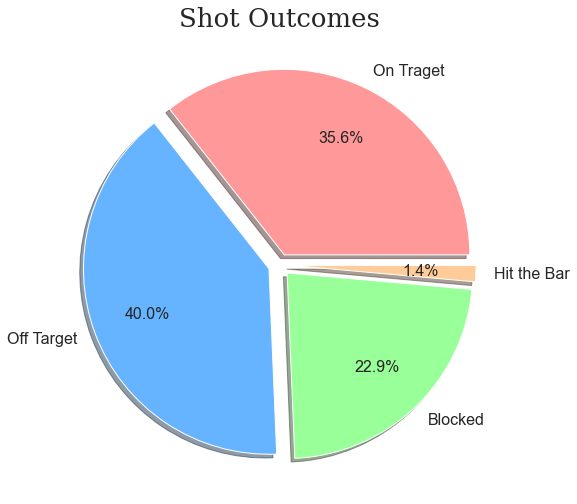

In [68]:
fig, ax = plt.subplots(figsize=[8,8])
labels = pie['shot_outcome']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
plt.pie(x=pie['count'], autopct="%.1f%%", labels=labels, explode=[0.06]*4, pctdistance=0.7, colors=colors, shadow=True, \
       textprops=dict(fontsize=16))
plt.title("Shot Outcomes", fontsize=26, fontfamily='serif')
plt.tight_layout()
plt.show()

In [69]:
bar = df_shots[['shot_place', 'id_event']].groupby('shot_place').count().reset_index().rename(columns={'id_event': 'count'})
bar.shot_place = bar.shot_place.astype(int)
bar.shot_place = bar.shot_place.replace({1: 'Bit too high', 2: 'Blocked', 3: 'Bottom left corner', 4: 'Bottom right corner', \
                                        5: 'Centre of the goal', 6: 'High and wide', 7: 'Hits the bar', 8: 'Misses to the left', \
                                        9: 'Misses to the right', 10: 'Too high', 11: 'Top centre of the goal', \
                                        12: 'Top left corner', 13: 'Top right corner'})

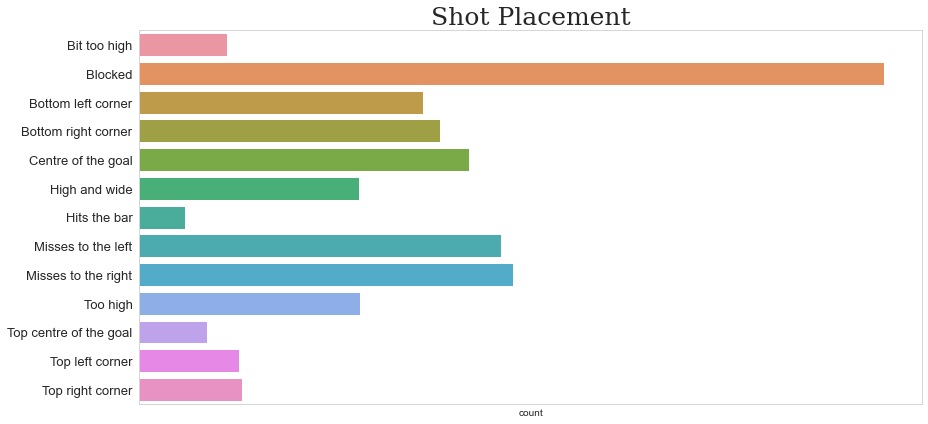

In [70]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=[13,6])
labels = bar['shot_place']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
ax = sns.barplot(x=bar['count'], y=labels)
ax.set_yticklabels(labels, size = 13)
ax.set_xticks(np.arange(1000,7000,15000))
ax.set_ylabel(ylabel='')
plt.title("Shot Placement", fontsize=25, fontfamily='serif')
plt.tight_layout()
ax.grid(color='black', linestyle='-', linewidth=0.1, axis='x')
plt.show()

In [71]:
goals  = df_shots[['is_goal', 'id_event', 'country']].groupby(['is_goal', 'country']).count().reset_index().rename(columns={'id_event': 'count'})
goals.is_goal = goals.is_goal.replace({1: 'Goal', 0: 'No Goal'})
goals.head()

,is_goal,country,count
0,No Goal,france,874
1,No Goal,germany,839
2,No Goal,spain,188
3,Goal,france,100
4,Goal,germany,100


In [72]:
goals['percentage']=0
for i in range(len(goals)): 
    for country in goals.country.unique():
        if goals.iloc[i, goals.columns.get_loc("country")] == country:
            goals.iloc[i,goals.columns.get_loc("percentage")]=goals.iloc[i,goals.columns.get_loc("count")] / \
                                                            goals[goals.country==country]['count'].sum()
goals['percentage']=round(goals['percentage']*100,2)

In [73]:
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.2f}%'.format(p.get_height())
            ax.text(_x, _y+2, value, ha="center", fontsize=14) 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

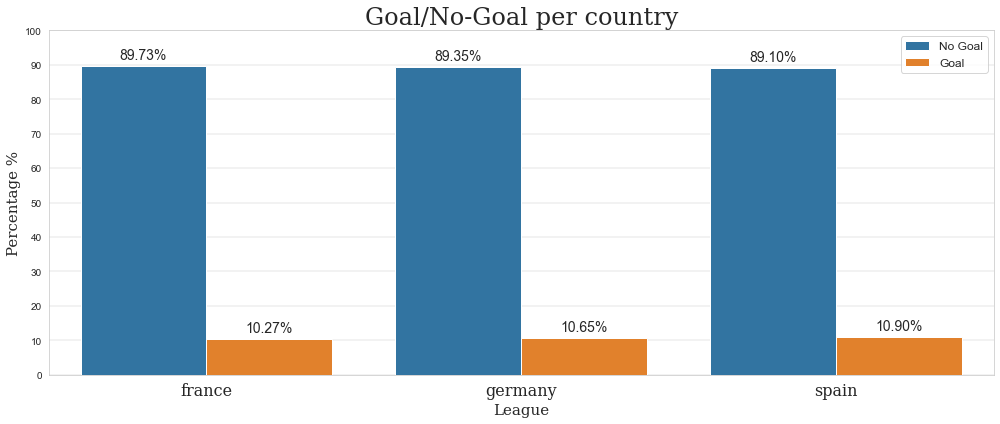

In [74]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=[14,6])
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
ax = sns.barplot(data=goals, y='percentage', hue='is_goal', x='country')
ax.set_yticks(np.arange(0,110,10))
ax.set_ylabel(ylabel='Percentage %', fontsize=15, fontfamily='serif')
ax.set_xlabel(xlabel='League', fontsize=15, fontfamily='serif')
ax.set_xticklabels(labels=ax.get_xticklabels(), fontsize=16, fontfamily='serif')
plt.title("Goal/No-Goal per country", fontsize=24, fontfamily='serif')
plt.tight_layout()
ax.grid(color='black', linestyle='-', linewidth=0.1, axis='y')
plt.legend(fontsize=12)
show_values_on_bars(ax)
plt.show()

In [75]:
goals  = df_shots[['is_goal', 'id_event', 'year']].groupby(['is_goal', 'year']).count().reset_index().rename(columns={'id_event': 'count'})
goals.is_goal = goals.is_goal.replace({1: 'Goal', 0: 'No Goal'})
goals.head()

,is_goal,year,count
0,No Goal,2011,1901
1,Goal,2011,223


In [76]:
goals['percentage']=0
for i in range(len(goals)):
    for year in goals.year.unique():
        if goals.iloc[i,goals.columns.get_loc("year")]==year:
            goals.iloc[i,goals.columns.get_loc("percentage")]=goals.iloc[i,goals.columns.get_loc("count")] / \
                                                            goals[goals.year==year]['count'].sum()
goals['percentage']=round(goals['percentage']*100,2)

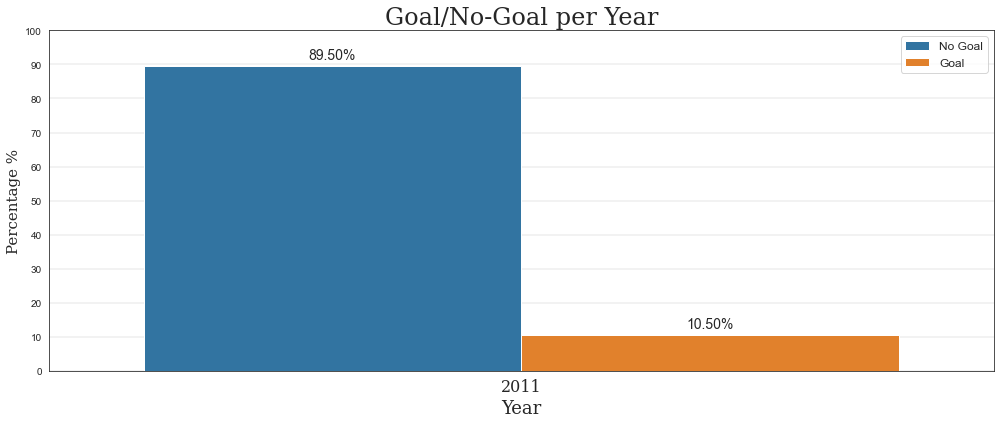

In [77]:
sns.set_style("white")
fig, ax = plt.subplots(figsize=[14,6])
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
ax = sns.barplot(data=goals, y='percentage', hue='is_goal', x='year')
ax.set_yticks(np.arange(0,110,10))
ax.set_ylabel(ylabel='Percentage %', fontsize=15, fontfamily='serif')
ax.set_xlabel(xlabel='Year', fontsize=18, fontfamily='serif')
ax.set_xticklabels(labels=ax.get_xticklabels(), fontsize=16, fontfamily='serif')
plt.title("Goal/No-Goal per Year", fontsize=24, fontfamily='serif')
plt.tight_layout()
ax.grid(color='black', linestyle='-', linewidth=0.1, axis='y')
plt.legend(fontsize=12)
show_values_on_bars(ax)
plt.show()

In [78]:
#xG Model

data = pd.get_dummies(df_shots.iloc[:,-8:-3], columns=['location', 'bodypart','assist_method', 'situation'])
data.columns = ['fast_break', 'loc_centre_box', 'loc_diff_angle_lr', 'diff_angle_left', 'diff_angle_right',
                'left_side_box', 'left_side_6ybox', 'right_side_box', 'right_side_6ybox', 'close_range',
                'penalty', 'outside_box', 'long_range', 'more_35y', 'more_40y', 'not_recorded', 'right_foot', 
                'left_foot', 'header', 'no_assist', 'assist_pass', 'assist_cross', 'assist_header',
                'assist_through_ball', 'open_play', 'set_piece', 'corner', 'free_kick']
data['is_goal'] = df_shots['is_goal']

In [79]:
print(len(data))
print(data.is_goal.sum())
print(len(data.columns)-1)

2124
223
28


In [80]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=1)

In [83]:
#Gradient Boosting Classifier

# from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

def evaluate_model(params): 
    model = GradientBoostingClassifier(
                        learning_rate=params['learning_rate'],
                        min_samples_leaf=params['min_samples_leaf'],
                        max_depth = params['max_depth'],
                        max_features = params['max_features']
                        )

    model.fit(X_train, y_train)
    return {
        'learning_rate': params['learning_rate'],
        'min_samples_leaf': params['min_samples_leaf'],
        'max_depth': params['max_depth'],
        'max_features': params['max_features'],
        'train_ROCAUC': roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]),
        'test_ROCAUC': roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]),
        'recall': recall_score(y_test, model.predict(X_test)),
        'precision': precision_score(y_test, model.predict(X_test)),
        'f1_score': f1_score(y_test, model.predict(X_test)),
        'train_accuracy': model.score(X_train, y_train),
        'test_accuracy': model.score(X_test, y_test),
    }

def objective(params):
    res = evaluate_model(params)
    
    res['loss'] = - res['test_ROCAUC'] # Esta loss es la que hyperopt intenta minimizar
    res['status'] = STATUS_OK # Asi le decimos a hyperopt que el experimento salio bien
    return res 

